In [1]:
import pandas as pd
import matplotlib.pyplot as axes
import numpy as np
from matplotlib.pyplot import figure, xticks

import json
import glob
import argparse
import numpy as np
from tabulate import tabulate

# import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt


# plt.style.use('ggplot')

pd.set_option('display.max_colwidth', None)
# pd. set_option('display.max_rows', None)
from icecream import ic
import math

In [2]:
df_perturb = pd.read_csv(r"./result-analysis/perturb.csv").iloc[1: , :]
df_twostep = pd.read_csv(r"./result-analysis/two-step.csv").iloc[1: , :]
df_joint = pd.read_csv(r"./result-analysis/joint.csv").iloc[1: , :]

# df_perturb[""]
df_perturb.insert(loc=4, column='adv_train_method', value="perturb. only")
df_twostep.insert(loc=4, column='adv_train_method', value="two-step")
df_joint.insert(loc=4, column='adv_train_method', value="joint")

In [3]:
# print(df_perturb.columns)

# print(df_twostep.columns)

# print(df_joint.columns)

In [4]:
df_perturb.columns = [
    'filename', 'model_target', 'downstream_task', 'perturbation_technique', 'adv_train_method',
    'codemix_lang', 'perturb_ratio', 'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'adv_training_mean', 'adv_training_std', 'acc_improvement_on_adv_train_mean',
    'acc_improvement_on_adv_train_std', 'acc_adv_training_on_orig_mean',
    'acc_adv_training_on_orig_std', 'orig_acc_vs_adv_mean', 'orig_acc_vs_adv_std',
    'avg_running_time(s)'
]

df_twostep.columns = [
    'filename', 'model_target', 'downstream_task', 'perturbation_technique', 'adv_train_method',
    'codemix_lang', 'perturb_ratio', 'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'adv_training_mean', 'adv_training_std', 'acc_improvement_on_adv_train_mean',
    'acc_improvement_on_adv_train_std', 'acc_adv_training_on_orig_mean',
    'acc_adv_training_on_orig_std', 'orig_acc_vs_adv_mean', 'orig_acc_vs_adv_std',
    'avg_running_time(s)'
]

df_joint.columns = [
    'filename', 'model_target', 'downstream_task', 'perturbation_technique', 'adv_train_method',
    'codemix_lang', 'perturb_ratio', 'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'adv_training_mean', 'adv_training_std', 'acc_improvement_on_adv_train_mean',
    'acc_improvement_on_adv_train_std', 'acc_adv_training_on_orig_mean',
    'acc_adv_training_on_orig_std', 'orig_acc_vs_adv_mean', 'orig_acc_vs_adv_std',
    'avg_running_time(s)'
]


numcols = [
    'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'adv_training_mean', 'adv_training_std', 'acc_improvement_on_adv_train_mean',
    'acc_improvement_on_adv_train_std', 'acc_adv_training_on_orig_mean',
    'acc_adv_training_on_orig_std', 'orig_acc_vs_adv_mean', 'orig_acc_vs_adv_std',
    'avg_running_time(s)'
    ]

# df_comb[numcols] = df_comb[numcols]
df_perturb[numcols] = df_perturb[numcols].apply(pd.to_numeric, errors='coerce')
df_perturb[numcols] = df_perturb[numcols].apply(lambda x: x*100)

df_twostep[numcols] = df_twostep[numcols].apply(pd.to_numeric, errors='coerce')
df_twostep[numcols] = df_twostep[numcols].apply(lambda x: x*100)

df_joint[numcols] = df_joint[numcols].apply(pd.to_numeric, errors='coerce')
df_joint[numcols] = df_joint[numcols].apply(lambda x: x*100)

In [5]:
df_comb = pd.concat([df_perturb, df_twostep, df_joint], axis=0).reset_index()

# df_comb.drop('index')
df_comb = df_comb.drop(df_comb.columns[0], axis=1)
df_comb

,filename,model_target,downstream_task,perturbation_technique,adv_train_method,codemix_lang,perturb_ratio,before_attack_acc_mean,before_attack_acc_std,after_attack_acc_mean,...,avg_semantic_sim_std,adv_training_mean,adv_training_std,acc_improvement_on_adv_train_mean,acc_improvement_on_adv_train_std,acc_adv_training_on_orig_mean,acc_adv_training_on_orig_std,orig_acc_vs_adv_mean,orig_acc_vs_adv_std,avg_running_time(s)
0,indobert-emotion-codemixing-en-adv-0.2.csv,indobert,emotion,codemixing,perturb. only,en,0.2,72.424242,0.860441,63.030303,...,0.026055,67.803030,2.877791,4.772727,4.336087,48.712121,9.959456,-23.712121,10.514486,43.624902
1,indobert-emotion-codemixing-en-adv-0.4.csv,indobert,emotion,codemixing,perturb. only,en,0.4,72.424242,0.860441,62.878788,...,0.059839,66.590909,0.990659,3.712121,3.102363,49.924242,9.664660,-22.500000,10.342782,42.876432
2,indobert-emotion-codemixing-en-adv-0.6.csv,indobert,emotion,codemixing,perturb. only,en,0.6,72.424242,0.860441,62.651515,...,0.104744,64.696970,2.430154,2.045455,4.424528,44.393939,11.339368,-28.030303,11.549242,24.182341
3,indobert-emotion-codemixing-en-adv-0.8.csv,indobert,emotion,codemixing,perturb. only,en,0.8,72.424242,0.860441,62.348485,...,0.067485,61.666667,2.276512,-0.681818,4.245805,49.772727,5.242074,-22.651515,5.263380,24.619197
4,indobert-emotion-codemixing-fr-adv-0.2.csv,indobert,emotion,codemixing,perturb. only,fr,0.2,72.424242,0.860441,62.045455,...,0.015703,67.196970,2.387265,5.151515,4.042219,44.924242,10.886182,-27.500000,10.972825,44.779826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,xlmrlarge-sentiment-codemixing-su-adv-0.8.csv,xlmrlarge,sentiment,codemixing,joint,su,0.8,94.066667,0.702377,90.200000,...,0.050356,94.066667,0.577350,3.866667,0.757188,95.333333,0.416333,1.266667,0.305505,69.625400
836,xlmrlarge-sentiment-sr-adv-0.2.csv,xlmrlarge,sentiment,sr,joint,id,0.2,94.066667,0.702377,89.066667,...,0.072116,93.533333,1.285820,4.466667,1.270171,95.333333,0.577350,1.266667,1.222020,61.454327
837,xlmrlarge-sentiment-sr-adv-0.4.csv,xlmrlarge,sentiment,sr,joint,id,0.4,94.066667,0.702377,88.066667,...,0.077817,92.133333,0.611010,4.066667,0.702377,94.733333,1.137248,0.666667,0.461880,61.808033
838,xlmrlarge-sentiment-sr-adv-0.6.csv,xlmrlarge,sentiment,sr,joint,id,0.6,94.066667,0.702377,86.066667,...,0.233513,91.600000,1.400000,5.533333,0.832666,95.466667,0.230940,1.400000,0.529150,61.841513


In [6]:
# df_perturb.to_csv("df_perturb_cleaned.csv", index=False)
# df_perturb = pd.read_csv("df_perturb_cleaned.csv")

In [7]:
# df_austro_perturb = df_perturb[(df_perturb["model_target"] == "xlmrlarge") & (df_perturb["downstream_task"] == "sentiment") & (df_perturb["codemix_lang"].isin(["ms", "su", "jw"]))]
# df_euro_perturb = df_perturb[(df_perturb["model_target"] == "xlmrlarge") & (df_perturb["downstream_task"] == "sentiment") & ~(df_perturb["codemix_lang"].isin(["ms", "su", "jw", "id"]))]

# df_austro_twostep = df_twostep[(df_twostep["model_target"] == "xlmrlarge") & (df_twostep["downstream_task"] == "sentiment") & (df_twostep["codemix_lang"].isin(["ms", "su", "jw"]))]
# df_euro_twostep = df_twostep[(df_twostep["model_target"] == "xlmrlarge") & (df_twostep["downstream_task"] == "sentiment") & ~(df_twostep["codemix_lang"].isin(["ms", "su", "jw", "id"]))]

# df_austro_joint = df_joint[(df_joint["model_target"] == "xlmrlarge") & (df_joint["downstream_task"] == "sentiment") & (df_joint["codemix_lang"].isin(["ms", "su", "jw"]))]
# df_euro_joint = df_joint[(df_joint["model_target"] == "xlmrlarge") & (df_joint["downstream_task"] == "sentiment") & ~(df_joint["codemix_lang"].isin(["ms", "su", "jw", "id"]))]

# # df_austro

# # df_euro

# all_df = [df_austro_perturb, df_austro_twostep, ]

In [8]:


df_task = df_comb[(df_comb["downstream_task"] == "sentiment") & (df_comb["model_target"].isin(["xlmrlarge", "indobertlarge"]))].drop("filename", axis=1)

df_task = pd.pivot_table(data=df_task, 
                        index=["adv_train_method", 'model_target', "codemix_lang", "perturb_ratio"], 
                        values=['after_attack_acc_mean', 'after_attack_acc_std', 'adv_training_mean', 'adv_training_std', 'acc_adv_training_on_orig_mean', 'acc_adv_training_on_orig_std'],
                        aggfunc='mean')

df_task = pd.DataFrame(df_task.to_records())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_task)
# print(df_task)

,adv_train_method,model_target,codemix_lang,perturb_ratio,acc_adv_training_on_orig_mean,acc_adv_training_on_orig_std,adv_training_mean,adv_training_std,after_attack_acc_mean,after_attack_acc_std
0,joint,indobertlarge,en,0.2,94.800000,0.200000,94.133333,0.305505,92.066667,0.901850
1,joint,indobertlarge,en,0.4,94.933333,0.230940,94.266667,0.611010,91.733333,0.808290
2,joint,indobertlarge,en,0.6,95.133333,0.115470,94.200000,0.529150,91.533333,0.832666
3,joint,indobertlarge,en,0.8,95.133333,0.230940,93.866667,0.416333,91.666667,0.757188
4,joint,indobertlarge,fr,0.2,94.666667,0.305505,93.066667,0.305505,90.600000,0.800000
5,joint,indobertlarge,fr,0.4,94.133333,0.461880,92.000000,0.800000,90.200000,0.871780
6,joint,indobertlarge,fr,0.6,94.533333,0.702377,91.466667,0.503322,90.066667,1.101514
7,joint,indobertlarge,fr,0.8,95.066667,0.416333,91.933333,0.577350,89.866667,0.832666
8,joint,indobertlarge,id,0.2,94.666667,0.461880,92.200000,0.600000,90.400000,0.871780
9,joint,indobertlarge,id,0.4,94.666667,0.305505,91.533333,0.416333,89.600000,0.529150


In [9]:
# df_task[(df_task["adv_train_method"] == "joint") & (df_task["codemix_lang"] == "en")].adv_training_mean.values

# Plot Accuracy vs Perturbation By Language

6 Bahasa = 6 Figures
Tiap figures punya 4 linechart untuk tiap model

### Sentiment - English

<ipython-input-14-04b1dffccf19>:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=300)


<Figure size 432x288 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

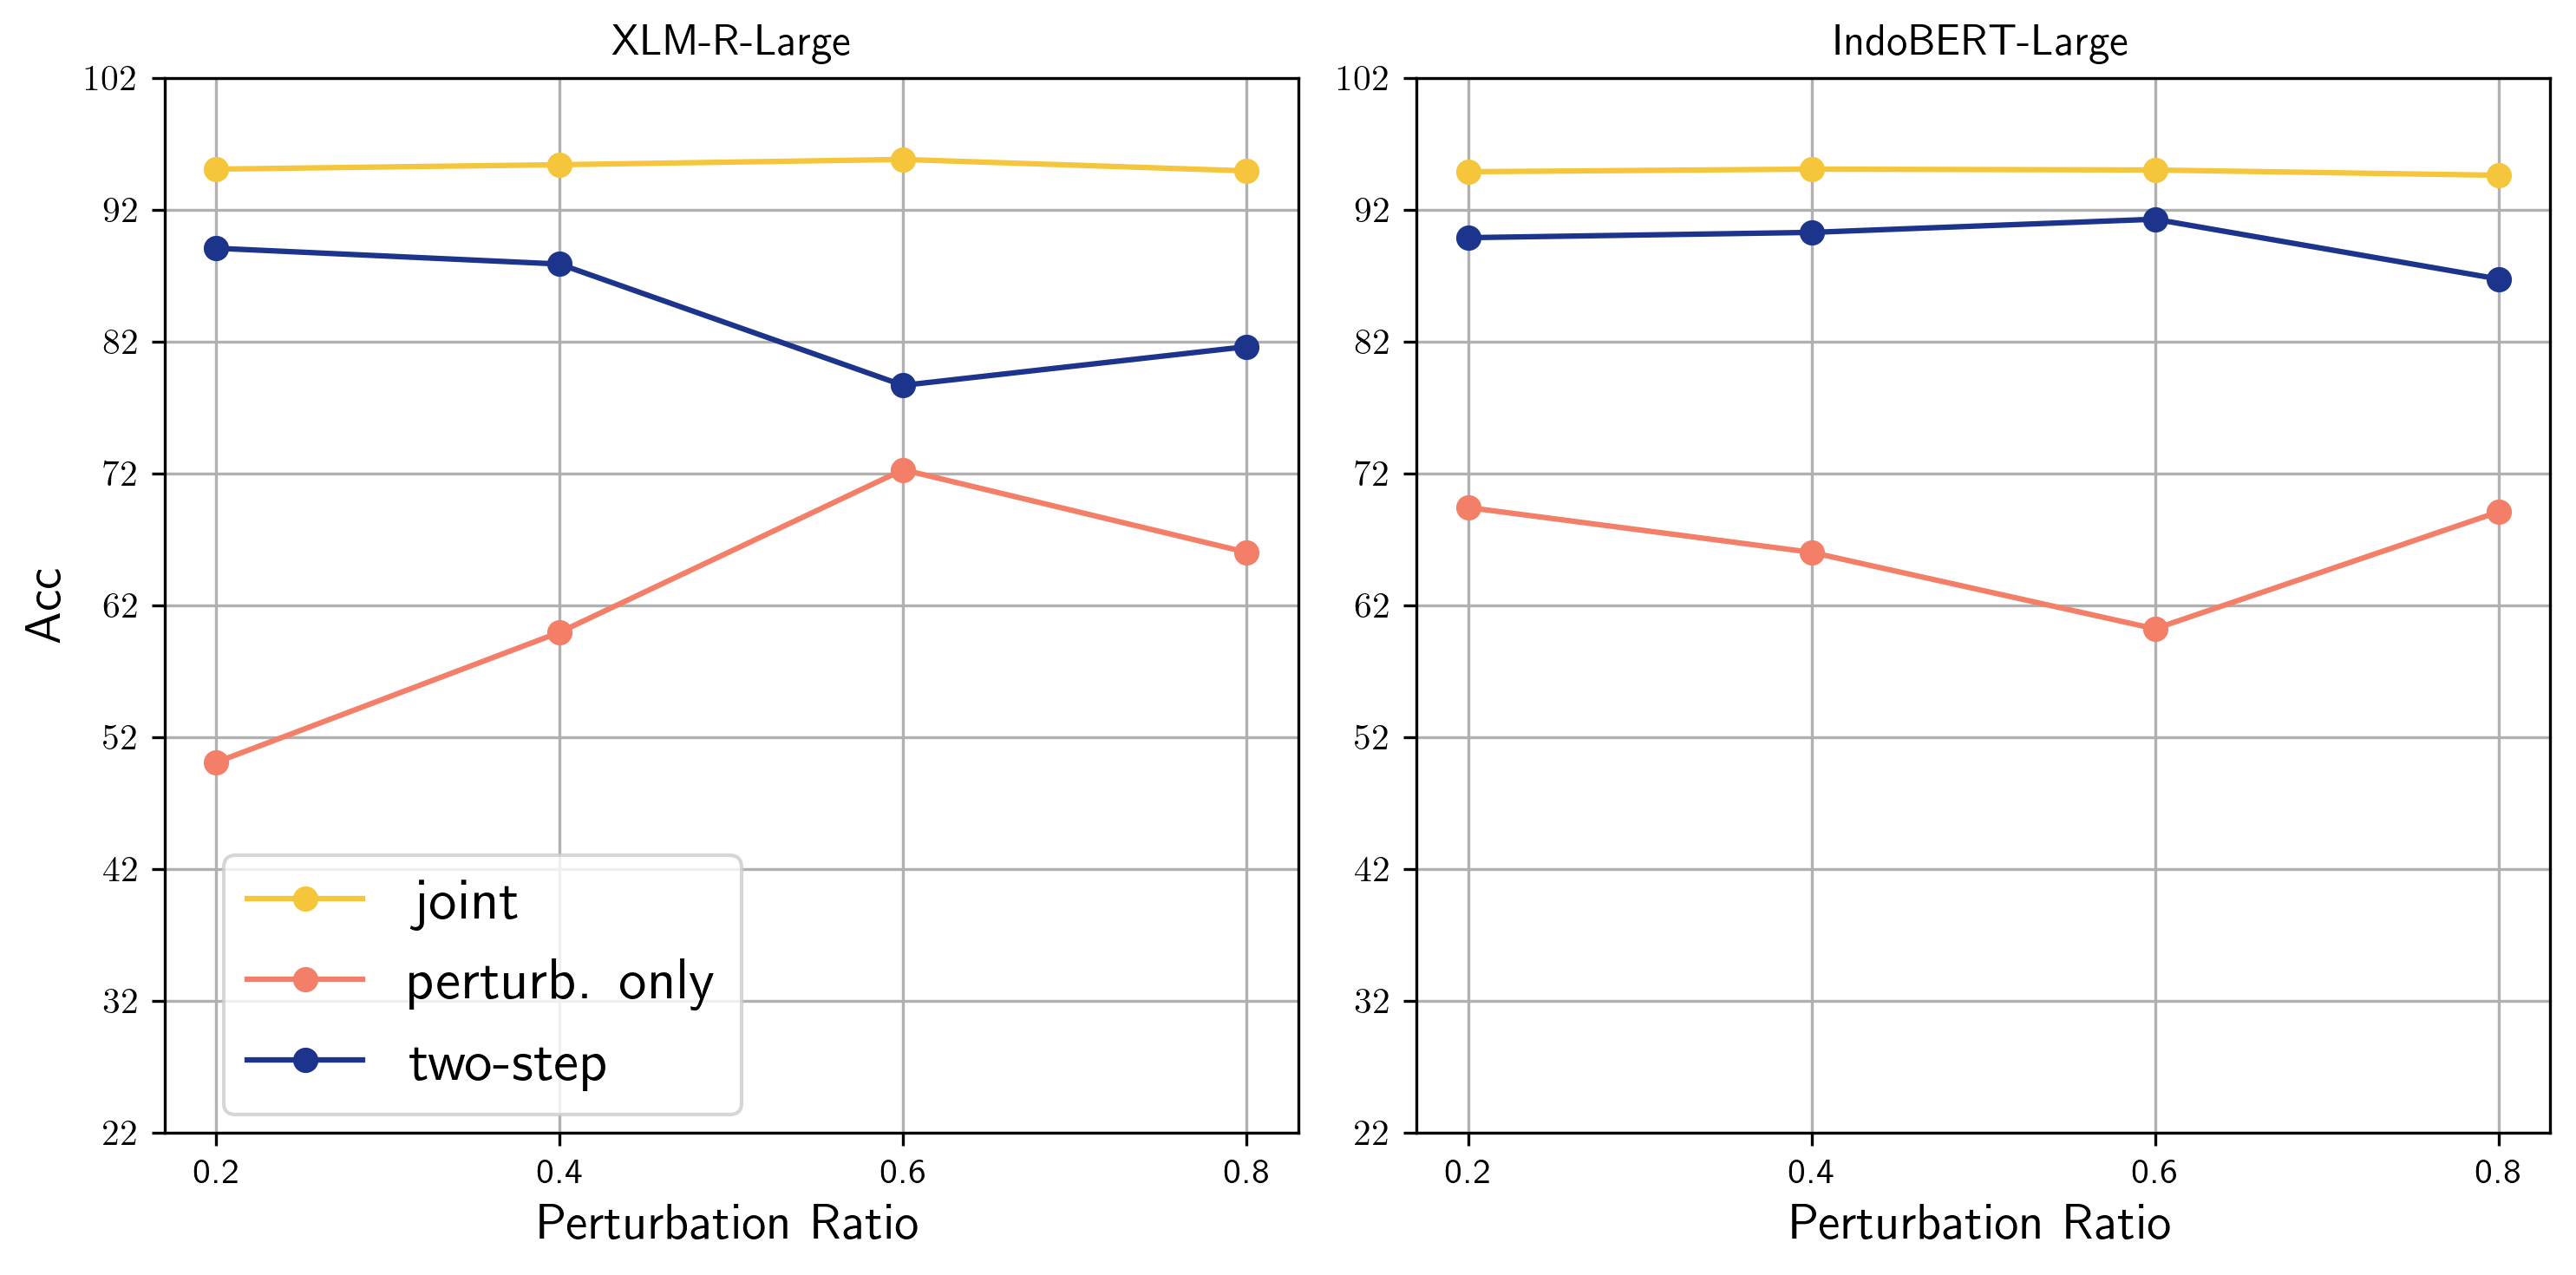

In [14]:

# plt.style.use('ggplot')

def visualize_1(task, dataset, lang, df=df_comb):   
    plt.clf()
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'joint': "#f5c63c", 
        'perturb. only': "#f47f68", 
        'two-step': "#1c348c"
        # 'mbert': "#b422c7", 
        # 'xlmr': "#2a9fe8"
    }

    model_map = {
        'indobert': "IndoBERT-Base", 
        'indobertlarge': "IndoBERT-Large", 
        'xlmrlarge': "XLM-R-Large",
        'mbert': "mBERT-Base", 
        'xlmr': "XLM-R-Base"
    }

    

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_task = df_comb[(df_comb["downstream_task"] == "sentiment") & (df_comb["model_target"].isin(["xlmrlarge", "indobertlarge"]))].drop("filename", axis=1)

    df_task = pd.pivot_table(data=df_task, 
                            index=["adv_train_method", 'model_target', "codemix_lang", "perturb_ratio"], 
                            values=['after_attack_acc_mean', 'after_attack_acc_std', 'adv_training_mean', 'adv_training_std', 'acc_adv_training_on_orig_mean', 'acc_adv_training_on_orig_std'],
                            aggfunc='mean')
    # ic(len(df_task))
                            
    df_task = pd.DataFrame(df_task.to_records())

    percent_pert = [0.2, 0.4, 0.6, 0.8]
    list_method = df_task.adv_train_method.unique()
    list_models = df_task.model_target.unique()
    
    # fig = plt.figure(num=None, figsize=(16,12), dpi=80)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), dpi=300)
    axs = {'xlmrlarge': ax1, 'indobertlarge': ax2}

    tasks = ['sentiment', 'emotion']

    plt.ticklabel_format(style = 'plain')
    max_threshold = 0
    min_threshold = 100

    # for task in tasks:
    for model in ['indobertlarge', 'xlmrlarge']:
        for method in list_method:
            if dataset == "perturb":
                acc_arr_mean = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == lang) & (df_task["model_target"] == model)].adv_training_mean.values
                acc_arr_std = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == lang) & (df_task["model_target"] == model)].adv_training_std.values
            elif dataset == "orig":
                acc_arr_mean = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == lang) & (df_task["model_target"] == model)].acc_adv_training_on_orig_mean.values
                acc_arr_std = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == lang) & (df_task["model_target"] == model)].acc_adv_training_on_orig_std.values

            
            acc_arr_min = acc_arr_mean - acc_arr_std
            acc_arr_max = acc_arr_mean + acc_arr_std

            # ic(max(acc_arr_max.tolist()))
            # ic(max(0, 94.87767675932744))
            maxlist = max(acc_arr_max.tolist())
            minlist = min(acc_arr_min.tolist())

            max_threshold = max(max_threshold, maxlist)
            min_threshold = min(min_threshold, minlist)
            
            vals_mean = dict(zip(percent_pert, acc_arr_mean))

            axs[model].plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(method), color=color_map[method])
            # axs[model].fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[method], interpolate=True, alpha=0.12)
                        
        axs[model].set_xticks(percent_pert)
        axs[model].set_xticklabels(percent_pert)
        
        # axs["xlmrlarge"].yaxis.tick_right()
        # axs["xlmrlarge"].yaxis.set_label_position("right")

        axs[model].set_xlabel('Perturbation Ratio', fontsize=14)
        axs[model].grid(True)
        # axs[model].set_yticks(range(math.floor(min_threshold), int(10 * ((math.ceil(max_threshold)//10)+1)), 10))
        
    ax1.set_ylabel('Acc', fontsize=14)
    ax1.yaxis.tick_left()
    ax1.yaxis.set_label_position("left")

    # ic(min_threshold, max_threshold)

    if dataset == "perturb":
        ax1.set_yticks(range(math.floor(min_threshold), int(((math.ceil(max_threshold)))), 1))
        ax2.set_yticks(range(math.floor(min_threshold), int(((math.ceil(max_threshold)))), 1))
    elif dataset == "orig":
        ax1.set_yticks(range(math.floor(min_threshold), int(10 * ((math.ceil(max_threshold)//10)+1)), 10))
        ax2.set_yticks(range(math.floor(min_threshold), int(10 * ((math.ceil(max_threshold)//10)+1)), 10))
    # ax1.set_yticks(range(50, 100, 10))
    # ax2.set_yticks([])

    # plt.yticks(range(math.floor(min_threshold), int(10 * ((math.ceil(max_threshold)//10)+1)), 10))
    ax1.set_title("XLM-R-Large")
    ax2.set_title("IndoBERT-Large")
    plt.tight_layout()
    # if task == "sentiment":
    #     plt.legend(loc="center right", bbox_to_anchor=(0.95,0.35))
    # elif task == "emotion":
    # plt.grid(True)
    plt.legend(fontsize=16, bbox_to_anchor=(-0.57,0.29))
    # plt.xlabel('Perturbation Ratio')
    # plt.ylabel('Accuracy (\%)')
    
    if dataset == "perturb":
        plt.savefig('viz/chart_3/'+str(lang)+'/'+str(task)+"_on_perturb"+'.png',bbox_inches='tight',pad_inches = 0)
    else:
        plt.savefig('viz/chart_3/'+str(lang)+'/'+str(task)+"_on_orig"+'.png',bbox_inches='tight',pad_inches = 0)

    # plt.show()

langs = ['en', 'fr', 'it', 'ms', 'su', 'jw']

for lang in langs:
    visualize_1("sentiment",lang=lang, dataset="perturb")
    visualize_1("emotion",lang=lang, dataset="perturb")

    visualize_1("sentiment",lang=lang, dataset="orig")
    visualize_1("emotion",lang=lang, dataset="orig")

In [ ]:
% % CHART 1
% ngebandingin 2 jenis language family indo-european vs austronesian.
% ambil model xlmr large (model terbaik)
% satu language family 1 warna, beda line style
% family lain pake beda warna
% 1 sentiment 1 emotion

% CHART 2
% perbandingan kenaikan perturbation ratio vs acc, ditambah std

% CHART 3
% nunjukkin seberapa jauh improvement dari sebelum dan sesudah ditrain, 
% perturbed test
% 

In [ ]:

# plt.style.use('ggplot')

def visualize_1(task, df=df_comb):   
    plt.clf()
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'joint': "#f5c63c", 
        'perturb. only': "#f47f68", 
        'two-step': "#1c348c"
        # 'mbert': "#b422c7", 
        # 'xlmr': "#2a9fe8"
    }

    model_map = {
        'indobert': "IndoBERT-Base", 
        'indobertlarge': "IndoBERT-Large", 
        'xlmrlarge': "XLM-R-Large",
        'mbert': "mBERT-Base", 
        'xlmr': "XLM-R-Base"
    }

    

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_task = df_comb[df_comb["downstream_task"] == task].drop("filename", axis=1)

    df_task = pd.pivot_table(data=df_task, 
                            index=["adv_train_method", "codemix_lang", "perturb_ratio"], 
                            values=['after_attack_acc_mean', 'after_attack_acc_std', 'adv_training_mean', 'adv_training_std', 'acc_adv_training_on_orig_mean', 'acc_adv_training_on_orig_std'],
                            aggfunc='mean')
    ic(len(df_task))
                            
    df_task = pd.DataFrame(df_task.to_records())

    percent_pert = [0.2, 0.4, 0.6, 0.8]
    list_method = df_task.adv_train_method.unique()
    list_models = 
    
    fig = plt.figure(num=None, figsize=(8, 6), dpi=80)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    axs = {'xlmrlarge': ax1, 'indobertlarge': ax2}

    plt.ticklabel_format(style = 'plain')


    for method in list_method:
        # acc_arr_mean = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == "en")].adv_training_mean.values
        # acc_arr_std = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == "en")].adv_training_std.values

        acc_arr_mean = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == "en")].acc_adv_training_on_orig_mean.values
        acc_arr_std = df_task[(df_task["adv_train_method"] == method) & (df_task["codemix_lang"] == "en")].acc_adv_training_on_orig_std.values


        # before_attack_acc_mean = df_task[(df_task["adv_train_method"] == model)].before_attack_acc_mean.values[0]
        # before_attack_acc_std = df_task[(df_task["adv_train_method"] == model)].before_attack_acc_std.values[0]

        # acc_arr_mean = np.insert(acc_arr_mean, 0, before_attack_acc_mean, axis=0)
        # acc_arr_std = np.insert(acc_arr_std, 0, before_attack_acc_std, axis=0)
        acc_arr_min = acc_arr_mean - acc_arr_std
        acc_arr_max = acc_arr_mean + acc_arr_std

        # acc_arr_mean = np.array(acc_arr_mean, dtype=float)
        # acc_arr_min = np.array(acc_arr_min, dtype=float)
        # acc_arr_max = np.array(acc_arr_max, dtype=float)
        
        vals_mean = dict(zip(percent_pert, acc_arr_mean))
        # vals_min = dict(zip(percent_pert, acc_arr_min))
        # vals_max = dict(zip(percent_pert, acc_arr_max))
        plt.grid(True)
        if "large" in model:
            plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(method), linestyle='--', color=color_map[method])
            plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[model], interpolate=True, alpha=0.12)
        else:
            plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(method), color=color_map[method])
            plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[method], interpolate=True, alpha=0.12)
        # else:
        # ic(method)
        # ic(acc_arr_mean)
        # ic(acc_arr_min)
        # ic(acc_arr_max)
            
    
    plt.xticks(percent_pert)
    # plt.xticklabels(percent_pert)

    plt.tight_layout()
    if task == "sentiment":
        plt.legend(loc="center right", bbox_to_anchor=(0.95,0.35))
    elif task == "emotion":
        plt.legend(loc="upper right")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy (\%)')
    title = 'ACC vs Perturbation Ratio on {}'.format(task_map[task])
    plt.title(title)
    
    
    # plt.savefig('viz/'+str(task)+'.png',bbox_inches='tight',pad_inches = 0)
    plt.show()


visualize_1("sentiment")
visualize_1("emotion")